In [9]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

driver = webdriver.Chrome(service=Service("../../driver/chromedriver-linux64/chromedriver"))
driver.get("https://www.selenium.dev/")

In [8]:
driver.close()

In [30]:
driver.current_url

'https://www.selenium.dev/'

In [31]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")

In [32]:
driver.execute_script("window.scrollTo(0,0)")

In [33]:
## 공백을 허용하지 않음
## 공백을 점으로 대체함
from selenium.webdriver.common.by import By
element = driver.find_element(By.CLASS_NAME, "d-flex.justify-content-center.p-5.td-box--100")

In [34]:
print(element.get_attribute('innerHTML'))

<h2 class="selenium">News</h2>


In [35]:
child = element.find_element(By.CLASS_NAME, "selenium")
print(child.text)

News


In [41]:
from selenium.webdriver.common.action_chains import ActionChains

actions = ActionChains(driver)
actions.move_to_element(child).perform()


In [26]:
driver.save_screenshot("../../data/image_01.png")

True

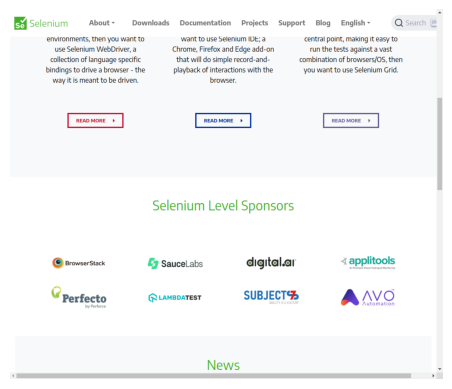

In [27]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("../../data/image_01.png")
plt.imshow(image)
plt.axis('off')
plt.show()

In [45]:
search_btn = driver.find_element(By.XPATH, '''//*[@id="docsearch"]/button/span[1]/span''')
search_btn.click()

In [47]:
from selenium.webdriver.common.keys import Keys

search_doc = driver.find_element(By.CSS_SELECTOR, "#docsearch-input")
search_doc.send_keys('find element python')

In [48]:
search_doc.send_keys(Keys.ENTER)

In [50]:
## xpath나 css selector는 바뀔 가능성이 높기 때문에 비추
## id, class와 같은 고유한 이름으로 find 하기를 권고
python_btn = driver.find_element(By.ID, "tabs-09-01-tab")
python_btn.click()

In [51]:
## 이전 페이지로 이동
driver.back()

In [92]:
menu = driver.find_element(By.ID, "main_navbar")
li_list = menu.find_elements(By.TAG_NAME, "li")
for idx, li in enumerate(li_list):
    print(idx)
    print(li.get_attribute('innerHTML'))

# about_bar = select_bar.find_element(By.CLASS_NAME, "nav-item dropdown")


0
<selenium.webdriver.remote.webelement.WebElement (session="da517baba0e0847d7f065373caa0bdc1", element="8655AB00C7EE4B42F8C099F5335A4916_element_644")>


AttributeError: 'list' object has no attribute 'find_elements'

In [86]:
about = li_list[1]
about.click()
link_list = about.find_elements(By.CLASS_NAME, "dropdown-item")
for link in link_list:
    print(link.text)

About Selenium
Structure and Governance
Events
Ecosystem
History
Get Involved
Sponsors


In [87]:
history = about.find_element(By.LINK_TEXT, "History")
history.click()

In [90]:
from selenium.webdriver import ActionChains
import time

## 이미  action이 실행된 상황에서는 오류가 남
actions = ActionChains(driver)
actions.click(about)
actions.click(history)
actions.perform()

In [89]:
driver.back()

about = li_list[1]
link_list = about.find_elements(By.CLASS_NAME, "dropdown-item")
for link in link_list:
    print(link.get_attribute("href"))

https://www.selenium.dev/about
https://www.selenium.dev/project
https://www.selenium.dev/events
https://www.selenium.dev/ecosystem
https://www.selenium.dev/history
https://www.selenium.dev/getinvolved
https://www.selenium.dev/sponsors


In [85]:
from bs4 import BeautifulSoup

page = driver.page_source
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<html class="no-js" itemscope="" itemtype="http://schema.org/WebPage" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/>
  <meta content="Hugo 0.110.0" name="generator"/>
  <link href="/index.xml" rel="alternate" type="application/rss+xml"/>
  <meta content="index, follow" name="robots"/>
  <link href="/favicons/favicon.ico" rel="shortcut icon"/>
  <link href="/favicons/apple-touch-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/favicons/android-36x36.png" rel="icon" sizes="36x36" type="image/png"/>
  <link href="/favicons/android-48x48.png" rel="icon" sizes="48x48" type="image/png"/>
  <link href="/favicons/android-72x72.png" rel="icon" sizes="72x72" type="image/png"/>
  <link href="/favicons/android-96x96.p

In [93]:
driver.close()